# Linear regression

The linear regression is a training procedure based on a linear model. The model makes a prediction by simply computing a weighted sum of the input features, plus a constant term called the bias term (also called the intercept term):

$$ \hat{y}=\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$


This can be writen more easy by using vector notation form:

$$\hat{y}= h_\theta(x) = \theta x$$

Now thta we have our mode, how do we train it?

Please, consider that training the model means adjusting the parameters to reduce the error or minimizing the cost function. The most common performance measure of a regression model is the Mean Square Error (MSE). Therefore, to train a Linear Regression model, you need to find the value of θ that minimizes the MSE:

$$ MSE(X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^T x^{(i)}-y^{(i)} \right)^2$$

# The normal equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution that gives the result directly. This is called the **Normal Equation**; and can be find it by derivating the *MSE* equation as a function of $\theta$ and making it equals to zero:


$$\hat{\theta} = (X^T X)^{-1} X^{T} y $$

## A basic example

First try to implemente the linear regressor by only using two instances or point $(x_0, y_0)$ and $(x_1,y_1)$, thus:

$$\hat{y}=\theta_0 + \theta_1 x$$

then, to write it in vector form

$$
    \hat{y}_0=
    \begin{bmatrix}
    \theta_0 & \theta_1
    \end{bmatrix} 
    \begin{bmatrix}
    1 \\ 
    x_0
    \end{bmatrix}
$$

Now, we need a matricial form to manage all data:

$$
    \begin{bmatrix}
    \hat{y}_0 \\ 
    \hat{y}_1\\
    \end{bmatrix}
    =
    \begin{bmatrix}
    \theta_0 + \theta_1 x_0 \\
    \theta_0 + \theta_1 x_1 \\
    \end{bmatrix}
$$

$$
    \begin{bmatrix}
    \hat{y}_0 \\ 
    \hat{y}_1\\
    \end{bmatrix}
    =
    \begin{bmatrix}
    1 &  x_0 \\
    1 &  x_1 \\
    \end{bmatrix}
    \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \end{bmatrix}
$$

Now, let's compute $\theta$ using the normal equation:

In [56]:
import numpy as np
X = np.array([[1,0.001],[1, 2.196]])
y = np.array([4.314825, 10.877373])
X

array([[1.000e+00, 1.000e-03],
       [1.000e+00, 2.196e+00]])

In [57]:
theta =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([4.31183523, 2.9897713 ])

This means that $\theta_0=4.3118$ and $\theta_1=2.9897$. The results are good enough to only use 2 point as training set.

## Using more data

Now, let us compute again the parameter by using more data; $n$ values. Therefore, the model will become:

$$
    \begin{bmatrix}
    \hat{y}_0 \\ 
    \hat{y}_1\\
    \vdots \\
    \hat{y}_n
    \end{bmatrix}
    =
    \begin{bmatrix}
    1 &  x_0 \\
    1 &  x_1 \\
    \vdots & \vdots \\
    1 & x_n
    \end{bmatrix}
    \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \vdots \\
    \theta_n
    \end{bmatrix}
$$


In [61]:
import pandas
data = pandas.read_csv('data.csv')
data

,X,y
0,0.001,4.314825
1,0.002,4.398001
2,0.003,4.288719
3,0.004,4.523691
4,0.005,4.519217
...,...,...
2191,2.192,11.566848
2192,2.193,11.090112
2193,2.194,11.088024
2194,2.195,10.728325


In [72]:
X = np.array(data['X'])
y = np.array(data['y'])
Xb = np.c_[np.ones((2196,1)), X]
Xb

array([[1.000e+00, 1.000e-03],
       [1.000e+00, 2.000e-03],
       [1.000e+00, 3.000e-03],
       ...,
       [1.000e+00, 2.194e+00],
       [1.000e+00, 2.195e+00],
       [1.000e+00, 2.196e+00]])

In [73]:
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)
theta

array([4.48142705, 3.01303764])

(0.0, 1.0, 4.0, 7.0)

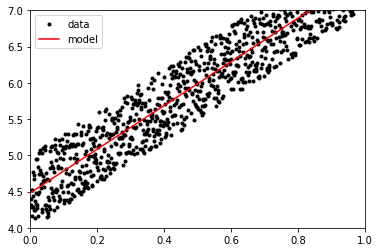

In [84]:
import matplotlib.pyplot as plt
# New instances to plot model
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #Se agrega x0=1 para cada instancia
y_predict = X_new_b.dot(theta)
plt.plot(X, y, '.k', label='data')
plt.plot(X_new, y_predict, "r-", label='model')
plt.legend()
plt.axis([0, 1, 4, 7])

## Using Sklearn to train the model
Python already includes a linear regression function within Scikit-Learn.

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xb, y)
lin_reg.intercept_, lin_reg.coef_

(4.481427054769864, array([0.        , 3.01303764]))

In [96]:
y_Pred=lin_reg.predict(X_new_b)

(0.0, 1.0, 4.0, 7.0)

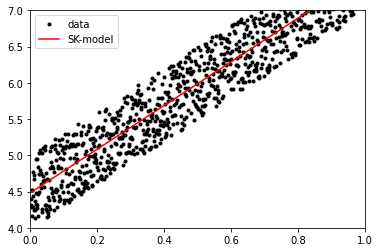

In [98]:
plt.plot(X,y, '.k', label='data')
plt.plot(X_new, y_Pred, '-r', label='SK-model')
plt.legend()
plt.axis([0, 1, 4, 7])

# Gradient Descent
## Batch Gradient Descent

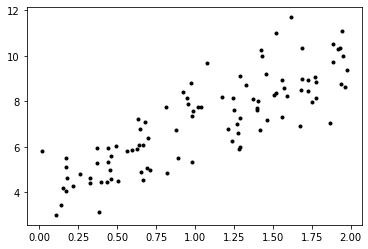

In [101]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, '.k')


In [103]:
eta = 0.1  # learning rate
n_iterations = 500
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.00817398],
       [2.92338619]])

In [124]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 500
    for iteration in range(n_iterations):
        if iteration < 50:
            y_predict = X_new_b.dot(theta)
            style = "-r" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16) # raw strings
    

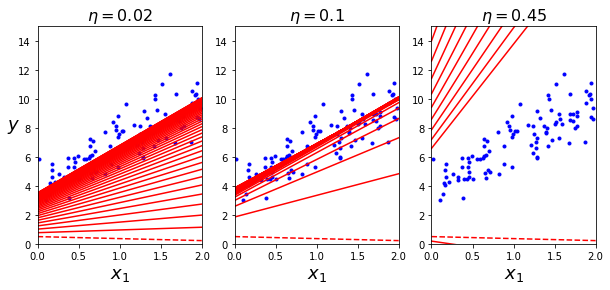

In [125]:
# radom initialization
np.random.seed(42)
theta = np.random.randn(2,1)

#plots
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.45)

## Stochastic Gradient Descent
Randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. 

The function that determines the learning rate at each iteration is called the learning schedule. 

**If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.**

In [176]:
m = len(X_b)
np.random.seed(50)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
theta = np.random.randn(2,1)  # random initialization

In [177]:
def learning_schedule(t):
    return t0 / (t + t1)

Text(0, 0.5, '$y$')

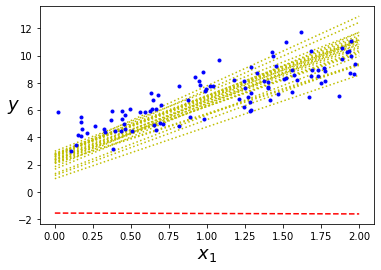

In [178]:
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 25:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = ":y" if i > 0 else "--r"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
#plt.axis([0, 2, 0, 15])                              # not shown

In [146]:
theta

array([[3.96982901],
       [2.9046423 ]])

By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole train‐ ing set, this code goes through the training set only 50 times and reaches a fairly good solution